In [1]:
import geopandas as gpd
import pandas as pd
import re

In [27]:
FILENAME1 = 'World Energy Data.csv'
FILENAME2 = 'countries.geojson'

#Find and Format
df_WED = gpd.read_file(FILENAME1)
df_WED.columns = df_WED.iloc[0]

#Choose year
year = '2005'  #1971 - 2020(prov)

#Finds Energy Production Data
df_WED_tot = df_WED.query("NoProduct == '11. Total'")
df_WED_tot_Production = df_WED_tot.query("NoFlow == '01. Production (PJ)'")
prod_year = df_WED_tot_Production.filter(['Country',year], axis=1)

#New DF Index
df_result = prod_year.reset_index(drop=True)

#Removes Non Country Data
df_result.drop(df_result.tail(9).index,inplace=True)

print("Energy Production data per OECD country for the year", year, 'in Peta Joules')
df_result.head()

Energy Production data per OECD country for the year 2005 in Peta Joules


,Country,2005
0,Australia,11102
1,Austria,411
2,Belgium,582
3,Canada,16829
4,Chile,391


In [25]:
#Cleanup geodata
gdf = gpd.read_file(FILENAME2)
gdf.columns = ['Country','ISO','geometry']
gdf = gdf.drop(columns = 'ISO')

#Replace Stray Names
gdf = gdf.replace("United States of America", 'United States')
gdf = gdf.replace("China", "People's Republic of China")
gdf = gdf.replace("South Korea", "Korea")
gdf = gdf.replace("Slovakia", "Slovak Republic")
# gdf.head()

In [26]:
#Merge datasets
df_map = df_result.merge(gdf)
gdf = gpd.GeoDataFrame(
    df_map, geometry= 'geometry')
# df_map.head(50)

<AxesSubplot:>

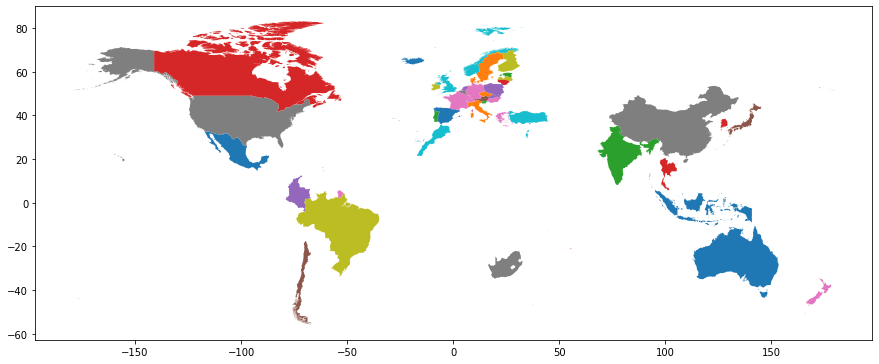

In [24]:
#Plot
gdf.plot(year, figsize=(15,15))